In [1]:
# Load Data
import pandas as pd

train = pd.read_csv("C:/Users/aminb/OneDrive/Documents/Data Science/Kaggle/Titanic/data/train.csv")
test = pd.read_csv("C:/Users/aminb/OneDrive/Documents/Data Science/Kaggle/Titanic/data/test.csv")

## Exploratory Data Analysis

In [2]:
# EDA

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Visualization

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [10]:
# Define a function to avoid redundacy in writing code

def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df =  pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

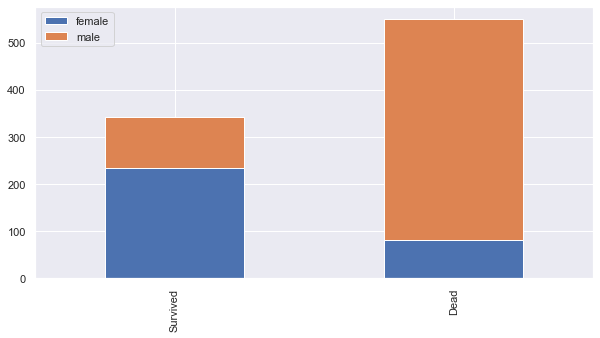

In [11]:
bar_chart('Sex')

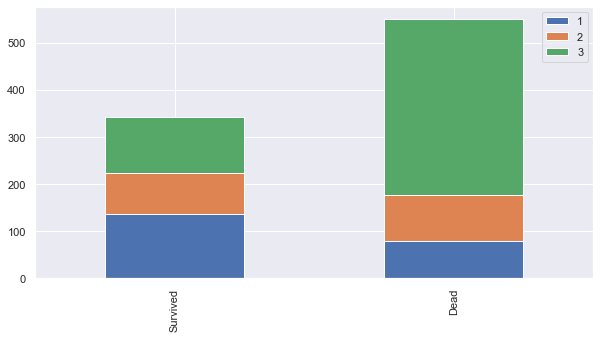

In [12]:
bar_chart('Pclass')

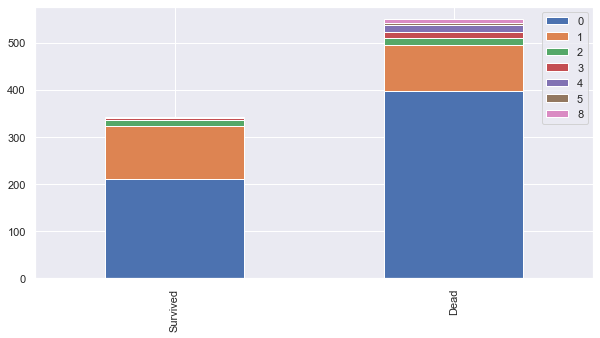

In [13]:
bar_chart('SibSp')

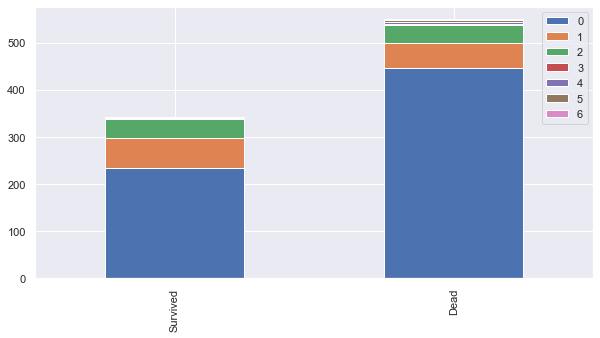

In [14]:
bar_chart('Parch')

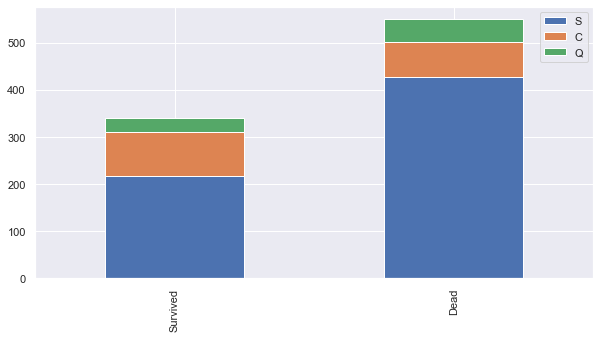

In [15]:
bar_chart('Embarked')

What is the clue of this chart??
It clearly shows that the passangers who embarked from Southampton more survived, Thatmeans, they are economically good position.

## Feature Engineering

In [16]:
# Create Title dataset from Name
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [17]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Countess      1
Lady          1
Sir           1
Ms            1
Jonkheer      1
Mme           1
Capt          1
Name: Title, dtype: int64

In [18]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

__Mapping the title like below__ <br> Mr : 0
<br> Miss : 1
<br> Mrs: 2
<br> Others: 3

In [19]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Col":3, "Rev":3, "Ms":3, "Dr":3, "Dona":3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [21]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


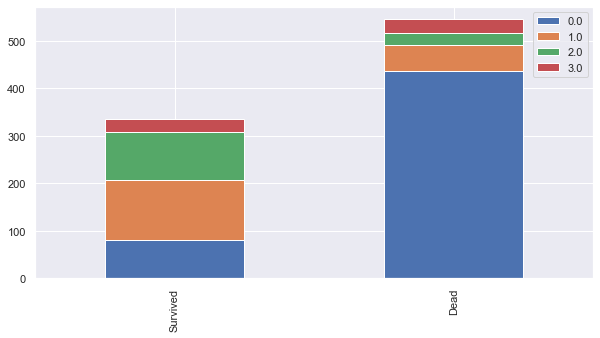

In [22]:
bar_chart('Title')

In [23]:
# Delete unnecessary 'Name' column
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [25]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [26]:
# Fill missing Title
train["Title"].fillna(0, inplace=True)
test["Title"].fillna(0, inplace=True)

__Sex Mapping:__
<br> Male = 0
<br> Female = 1

In [27]:
sex_mapping = {"male":0, "female":1}
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map(sex_mapping)

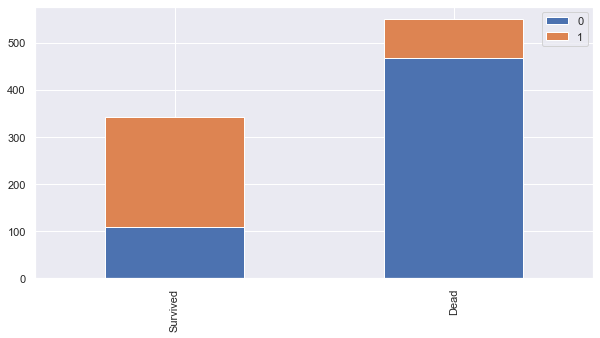

In [28]:
bar_chart('Sex')

## Age 
Too many age data missing. Fill those with mean value

In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


In [30]:
# Fill missing age with Meadian value of age of each title grpoup ( Mr, Ms, Mrs, others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

In [31]:
# check aage column no null value
train["Age"].isna().sum()

0

In [32]:
train["Age"].isna().sum()

0

## Try to understand data by  examine some charts

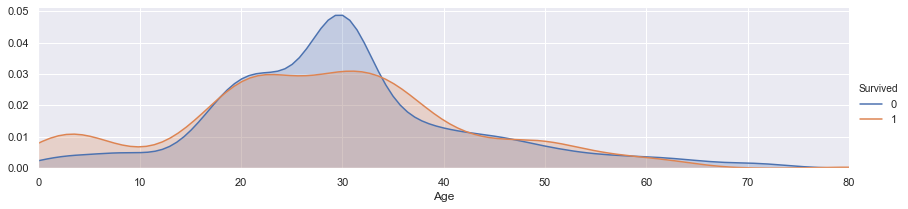

In [33]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age",shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()

plt.show()

It indicates that age range 18-38 died more.

(0, 20)

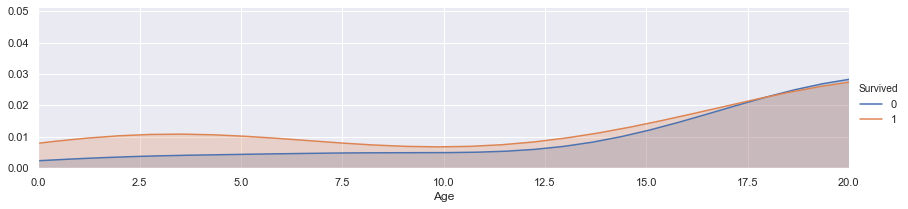

In [34]:
# Age Range (0-20)
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age",shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()
plt.xlim(0,20)

(20, 40)

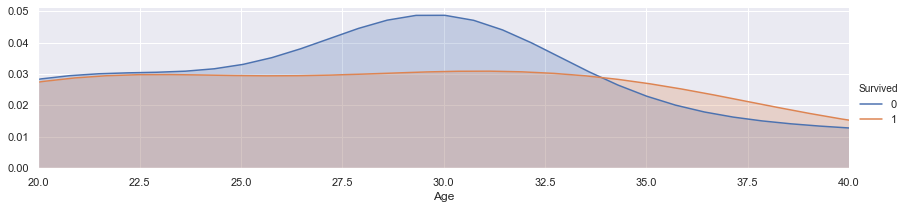

In [35]:
# Age Range (20-40)
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age",shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()
plt.xlim(20,40)

(40, 60)

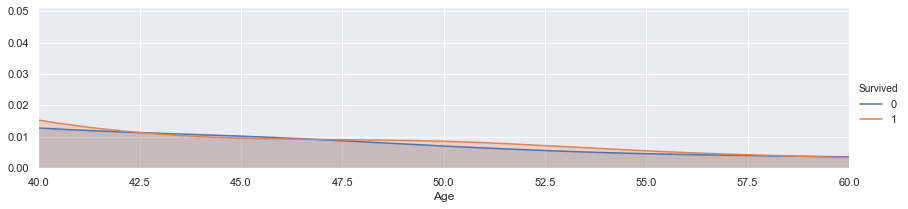

In [36]:
# Age Range (40-60)
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age",shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()
plt.xlim(40,60)

Chage contineous variable of Age into categorical variable and collect in different bins:<br>
            child: 0  <br>
             young: 1  <br>
             adult: 2  <br>
             mid-age: 3 <br> 
             senior: 4

In [37]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"] <= 16, "Age"] = 0,
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 26), "Age"] = 1,
    dataset.loc[(dataset["Age"] > 26) & (dataset["Age"] <= 36), "Age"] = 2,
    dataset.loc[(dataset["Age"] > 36) & (dataset["Age"] <= 62), "Age"] = 3,
    dataset.loc[dataset["Age"] > 62, "Age"] = 4

In [38]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0


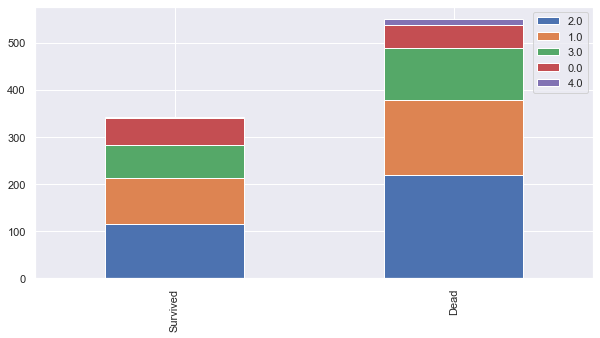

In [39]:
bar_chart('Age')

## Embarked

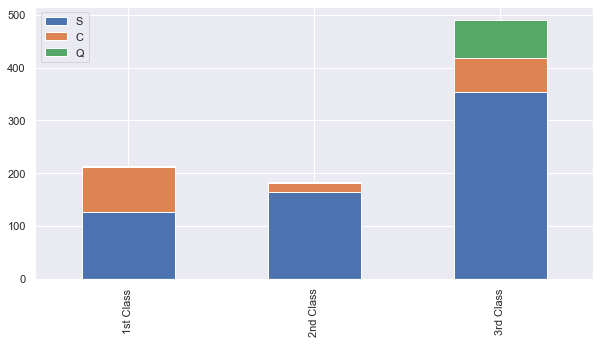

In [40]:
# Check 
pclass1 = train[train["Pclass"] == 1]["Embarked"].value_counts()
pclass2 = train[train["Pclass"] == 2]["Embarked"].value_counts()
pclass3 = train[train["Pclass"] == 3]["Embarked"].value_counts()
df = pd.DataFrame([pclass1, pclass2, pclass3])
df.index=['1st Class', '2nd Class', '3rd Class']
df.plot(kind='bar', stacked = True, figsize=(10,5))

So, We can esily observe that most of the passengers embarked from Sothampton. So, easily we can fill up the missing value with 'S'.

In [41]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset["Embarked"].fillna('S')

In [42]:
train.Embarked.isna().sum()

0

Maging the Embarked point by numeric value for ease of accountability.<br> S = 0 <br> C=1 <br>Q=3

In [43]:
embarked_mapping = {"S":0, "C":1, "Q":3}
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map(embarked_mapping)

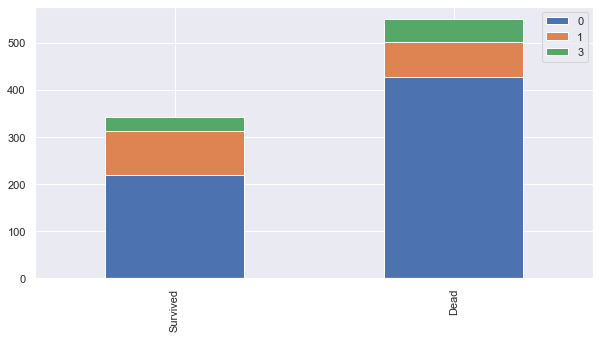

In [44]:
bar_chart('Embarked')

## Fare

In [45]:
# fill the missing value of Fare by median of each Pclass
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [46]:
#check
train.Fare.isna().sum()

0

In [47]:
test.Fare.isna().sum()

0

__Examine some charts__<br> To findout who survived - cheap ticket fare or expensive one.

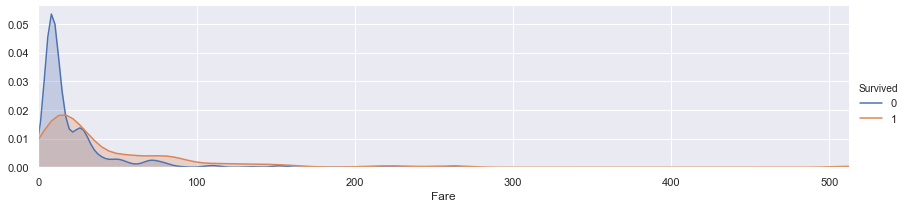

In [48]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Fare",shade=True)
facet.set(xlim=(0,train["Fare"].max()))
facet.add_legend()

plt.show()

(0, 20)

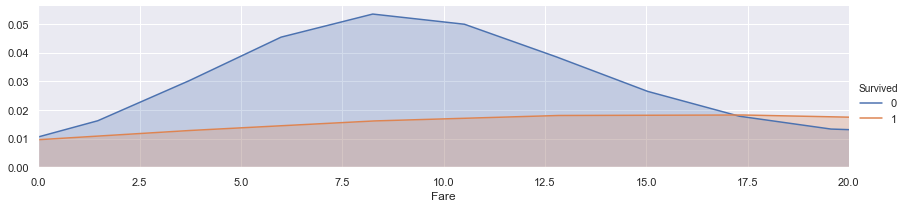

In [49]:
#Range: 0-20
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Fare",shade=True)
facet.set(xlim=(0,train["Fare"].max()))
facet.add_legend()

plt.xlim(0,20)

(0, 30)

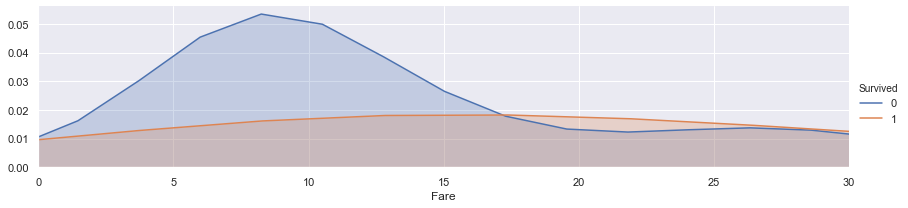

In [50]:
#Range: 0-30
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Fare",shade=True)
facet.set(xlim=(0,train["Fare"].max()))
facet.add_legend()

plt.xlim(0,30)

So, easily founnd that those who boiuht ticket with around $8, they are not fortunate enough.

In [51]:
#Binning the Fare
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [52]:
# Check
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0.0


## Cabin

In [53]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
D              3
              ..
C99            1
D37            1
C110           1
C106           1
D50            1
Name: Cabin, Length: 147, dtype: int64

We don't need total number. Only first digit (e.g."C") is enogh to find the location.

In [54]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

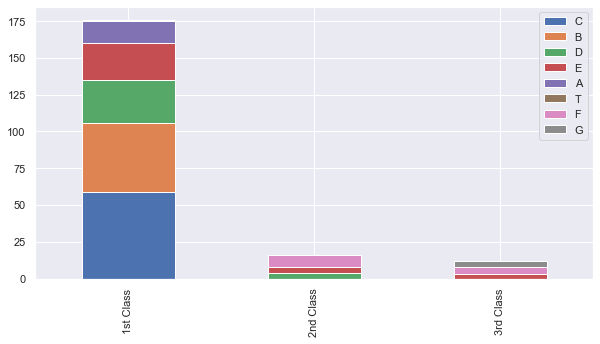

In [55]:
# Check 
pclass1 = train[train["Pclass"] == 1]["Cabin"].value_counts()
pclass2 = train[train["Pclass"] == 2]["Cabin"].value_counts()
pclass3 = train[train["Pclass"] == 3]["Cabin"].value_counts()
df = pd.DataFrame([pclass1, pclass2, pclass3])
df.index=['1st Class', '2nd Class', '3rd Class']
df.plot(kind='bar', stacked = True, figsize=(10,5))

Did you only !st class has A,B & C, Others don't have. so, we can do a mapping in equal distance(0.4) and fillup missing value with meadian fare.

In [56]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [57]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

## Family Size

In [58]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

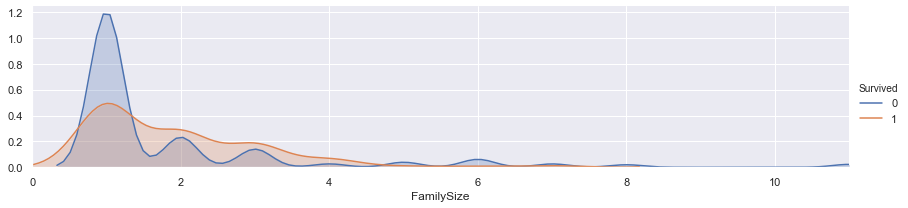

In [59]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [60]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [61]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0.0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2.0,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1.0,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2.0,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0.0,0.0


In [62]:
# Drop unnecessaruy variables
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [63]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape


((891, 8), (891,))

In [64]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0.0,0.4
1,1,1,3.0,2.0,0.8,1,2.0,0.4
2,3,1,1.0,0.0,2.0,0,1.0,0.0
3,1,1,2.0,2.0,0.8,0,2.0,0.4
4,3,0,2.0,0.0,2.0,0,0.0,0.0


# Modelling

In [65]:
# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np

In [66]:
#check 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null float64
FamilySize    891 non-null float64
dtypes: float64(5), int64(4)
memory usage: 62.8 KB


## Cross Validation (k-fold =10)

In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## Decision Tree

In [68]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.80898876 0.7752809  0.76404494 0.8988764  0.76404494
 0.83146067 0.82022472 0.73033708 0.79775281]


## Random Forest

In [69]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.84269663 0.79775281 0.7752809  0.87640449 0.80898876
 0.80898876 0.78651685 0.76404494 0.82022472]


In [70]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.92

## Kaggle upload file

In [71]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [72]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [73]:
#check
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
